In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../1_dock')
sys.path.append('../ifp')
sys.path.append('../mcss')
sys.path.append('../3_analyze')
from shared_paths import shared_paths
from containers import Protein
%matplotlib inline

In [2]:
datasets = [d for d in sorted(os.listdir(shared_paths['data']))
            if d[0] != '.' and d[-3:] != 'old']

In [6]:
data = {}
for i, d in enumerate(datasets):
    print(i, d)
    protein = Protein(d)
    lm = protein.lm

    ligands = lm.docked(lm.pdb)[:20]
    protein.load_docking(ligands, False, False, False)
    lm.mcss.load_mcss()
    for ligand in ligands:
        crystal_lig = "{}_lig".format(lm.st)
        if ligand == crystal_lig:
            size = 1
        else:
            size = lm.mcss.get_mcss_size(ligand, crystal_lig)
        rmsds = [pose.rmsd for pose in protein.docking[lm.st].ligands[ligand].poses]
        if d not in data: data[d] = {}
        data[d][ligand] = (size, rmsds)

(0, '5HT2B')
(1, 'A2AR')
(2, 'AR')
(3, 'B1AR')
(4, 'B2AR')
(5, 'BRAF')
(6, 'CDK2')
(7, 'CHK1')
(8, 'DTRANSP')
(9, 'ERA')
(10, 'GCR')
(11, 'GLUT1')
(12, 'JAK2')
(13, 'M3')
(14, 'MEK1')
(15, 'MGLUR5')
(16, 'MR')
(17, 'O60885')
(18, 'P00489')
(19, 'P00734')
(20, 'P00742')
(21, 'P00749')
(22, 'P00760')
(23, 'P03951')
(24, 'P07900')
(25, 'P18031')
(26, 'P24941')
(27, 'P56817')
(28, 'PLK1')
(29, 'Q16539')
(30, 'Q9Y233')
(31, 'SIGMA1')
(32, 'SMO')
(33, 'STRANSP')
(34, 'TRPV1')
(35, 'VITD')


In [7]:
print len(data)
print sum([len(v) for k, v in data.items()])
print
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print '{}\t{}'.format(key, count)

36
513

5HT2B	2
M3	2
SIGMA1	2
TRPV1	2
GLUT1	3
MGLUR5	5
STRANSP	5
SMO	7
B2AR	8
DTRANSP	9
AR	11
B1AR	12
PLK1	12
MR	13
P24941	13
P03951	14
O60885	17
A2AR	18
GCR	18
BRAF	20
CDK2	20
CHK1	20
ERA	20
JAK2	20
MEK1	20
P00489	20
P00734	20
P00742	20
P00749	20
P00760	20
P07900	20
P18031	20
P56817	20
Q16539	20
Q9Y233	20
VITD	20


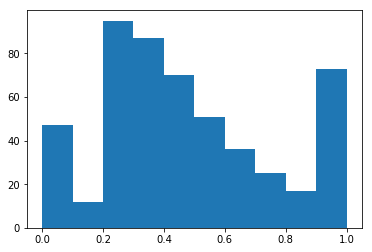

In [8]:
plt.hist([size for protein, ligands in data.items() for (size, rmsds) in ligands.values()])
plt.show()

# Fraction top pose correct

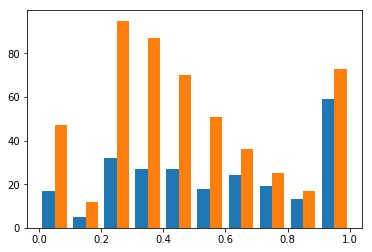

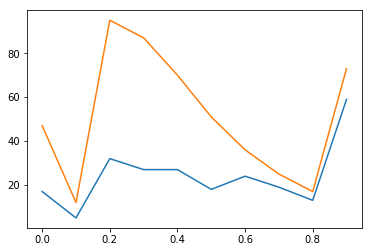

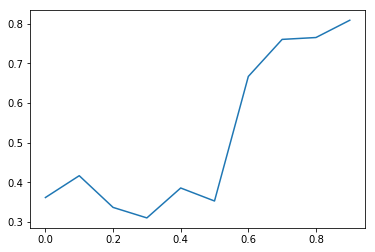

In [13]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if rmsds[0] <= 2.0]
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# Correct pose in top 100

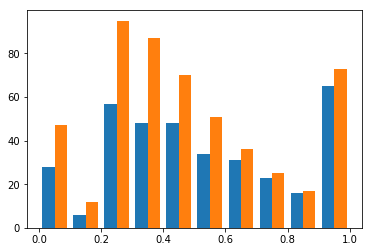

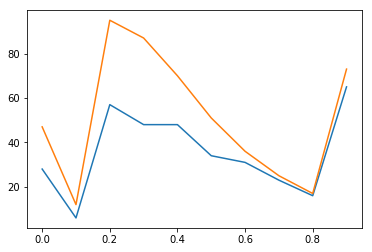

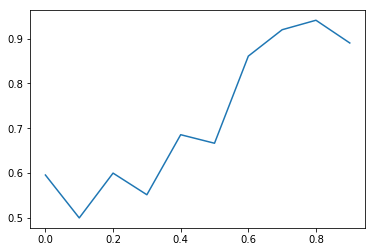

In [17]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if min(rmsds[:100]) <= 2.0]
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# Top pose correct given that one exists in top 100

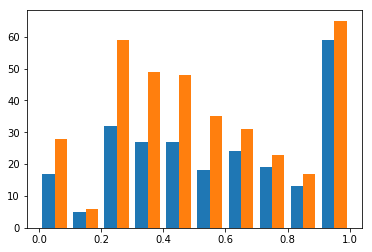

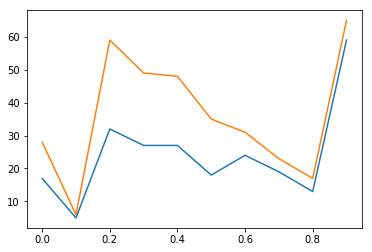

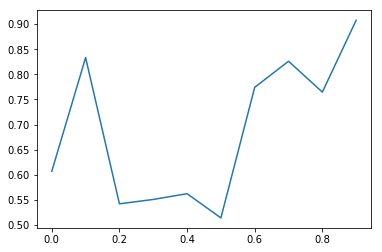

In [15]:
correct = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if rmsds[0] <= 2.0]
total   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if min(rmsds) <= 2.0]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# What does MCSS size zero look like? 

In [18]:
c = 0
for protein, ligands in data.items():
    for ligand, (size, rmsds) in ligands.items():
        if size == 0:
            c += 1
c

47